## Task
Реалізувати у вигляді програмного коду Parallel Merge Sort для паралельної реалізації.
- - - 

In [1]:
import os, sys, time
import numpy as np
import random
import multiprocessing

In [2]:
def merge_sort(array):
    if len(array) <= 1: 
        return array
    half = int(np.floor(len(array) / 2))
    left = array[:half]
    right = array[half:]
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left, right)

def merge(left, right):
    sorted_array = []
    while len(left) > 0 or len(right) > 0:
        if len(left) > 0 and len(right) > 0:
            if left[0] <= right[0]:
                sorted_array.append(left.pop(0))
            else:
                sorted_array.append(right.pop(0))
        elif len(left) > 0:
            sorted_array.append(left.pop(0))
        elif len(right) > 0:
            sorted_array.append(right.pop(0))
    return sorted_array

def seq_alg(array):
    merge_sort(array)

In [3]:
def parall_merge_sort(array, q):
    
    if len(array) <= 1:
        q.put(merge_sort(array))
        q.close()
        return
    
    half = int(np.floor(len(array) / 2))
    left = multiprocessing.Queue()
    left_p = multiprocessing.Process(target=parall_merge_sort, args=(array[:half], left))
    
    right = multiprocessing.Queue()
    right_p = multiprocessing.Process(target=parall_merge_sort, args=(array[half:], right))
    
    left_p.start()
    right_p.start()
    q.put(merge(left.get(), right.get()))
    q.close()
    left_p.join()
    right_p.join()
    

def parall_alg(array):
    
    q = multiprocessing.Queue()
    p = multiprocessing.Process(target=parall_merge_sort, args=(array, q))
    p.start()
    array = q.get()
    p.join()

In [4]:
seq_time = []
parall_time = []

for i in range(11):
    input_ = [int(random.uniform(-100, 100)) for i in range(np.power(2, i))]
    
    start = time.time()
    seq_alg(input_)
    seq_time.append(time.time() - start)

    start = time.time()
    parall_alg(input_)
    parall_time.append(time.time() - start)

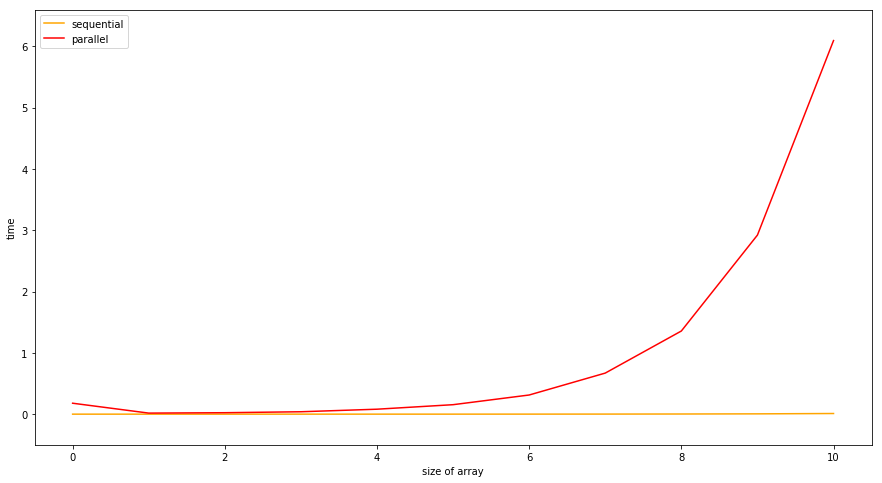

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.xlabel("size of array")
plt.ylabel("time")
plt.plot(np.arange(len(seq_time)), seq_time, label='sequential', color='orange')
plt.plot(np.arange(len(parall_time)), parall_time, label='parallel', color='red')
plt.ylim((min(seq_time) - 0.5, max(parall_time) + 0.5))
plt.legend()
plt.show()